In [ ]:
# Preprocessing whole data 
import globs
import data_preproccesing

print("Data pre processing phase. It will take more then a while")
data_preproccesing.filter_whole_data(globs.globals.DATA_PATH, globs.globals.DATA_BASE_FILTER_PATH, globs.globals.ELEMENTS_TO_SAVE_CSV)
data_preproccesing.filter_height(globs.globals.DATA_BASE_FILTER_PATH, globs.globals.DATA_FILTER_HEIGHT_PATH, globs.globals.ELEMENTS_TO_SAVE_CSV)
data_preproccesing.sort_data(globs.globals.DATA_BASE_FILTER_PATH, globs.globals.DATA_BASE_FILTER_PATH_SORTED)
data_preproccesing.sort_data(globs.globals.DATA_FILTER_HEIGHT_PATH, globs.globals.DATA_FILTER_HEIGHT_PATH_SORTED)


In [1]:
# preproceessing whole data for specified city it requires preproccessed whole files
#TODO change resolution to 3000
import globs
import data_processing
print("Data processing phase it will be much faster")
res = 3000
ver=False
data_processing.proceed_region(globs.cities.TOKYO, file_to_save=globs.cities.TOKYO_FILE,resolution=res,verbose=ver)
# data_processing.proceed_region(globs.cities.ROME, file_to_save=globs.cities.ROME_FILE,resolution=res,verbose=ver)
# data_processing.proceed_region(globs.cities.KRAKOW, file_to_save=globs.cities.KRAKOW_FILE,resolution=res,verbose=ver)
# data_processing.proceed_region(globs.cities.CZARNOBYL, file_to_save=globs.cities.CZARNOBYL_FILE,resolution=res,verbose=ver)

Data processing phase it will be much faster
Loading csv file for lat: (35.49) - (35.87) lon: (139.45) - (139.95) 
Analyzing data: total_squares: 141 without_data: 78, with_data: 63, errors: 0


In [ ]:
# preproceessing whole data for specified region it requires preproccessed whole files
#TODO change resolution to 4000
import globs
import data_processing
print("Data processing phase it will be much faster")
res = 30000
ver = False
data_processing.proceed_region(globs.regions.EUROPE, file_to_save=globs.regions.EUROPE_FILE,resolution=res,verbose=ver)
data_processing.proceed_region(globs.regions.USA, file_to_save=globs.regions.USA_FILE,resolution=res,verbose=ver)
data_processing.proceed_region(globs.regions.CZECH, file_to_save=globs.regions.CZECH_FILE,resolution=res,verbose=ver)
data_processing.proceed_region(globs.regions.JAPAN, file_to_save=globs.regions.JAPAN_FILE,resolution=res,verbose=ver)

In [4]:
# fonction to create maps for proccessed data

#data need preparation first
# BUG: Size of each next map generated is bigger then previous
def make_maps(load_file, border, key, verbose=False,path=None,zoom=9):
    import globs
    import grid
    import data_processing
    import gmaps
    import matplotlib.pyplot as plt
    import matplotlib as mpl
    import os
    from ipywidgets.embed import embed_minimal_html
    squares_basic_data, squares_with_data = data_processing.load_data_from_file(load_file, verbose=verbose)
    gmaps.configure(api_key=key)
    lat_c, lon_c = grid.calculate_center_point(border)
    
    #TODO: make function from this
    gradient_google_maps = [(0,0,0,0.0),(0, 255,0,0.8), (255, 255,0,0.8),(255, 0,0,0.8)]
    tmp = [(rgba[0]/255,rgba[1]/255,rgba[2]/255,rgba[3]) for rgba in gradient_google_maps]
    gradient_matplotlib_bar = []
    ticks = 200
    for i in range(len(tmp) - 1):
        if i == 0:
            gradient_matplotlib_bar.append(tmp[0])
        current = tmp[i]
        following = tmp[i+1]
        gradient = []
        for j in range(4):
            gradient.append((following[j]-current[j])/ticks)
        for t in range(1,ticks):
            rgba_tmp = []
            for j in range(4):
                rgba_tmp.append(current[j] + t*gradient[j])
            gradient_matplotlib_bar.append(tuple(rgba_tmp))
    
    locations = []
    stds = []
    means = []
    mins = []
    maxs = []
    for pol, mean, std, min2, max2 in squares_basic_data:
        locations.append(grid.calculate_center_point(pol))
        stds.append(std)
        means.append(mean)
        mins.append(min2)
        maxs.append(max2)
    print(len(locations))

    for fig_type, data in [("Min", mins), ("Std", stds), ("Mean", means), ("Max", maxs)]:
        data = [d for d in data]
        
        
        fig = gmaps.figure(center=(lat_c, lon_c), zoom_level=zoom)
        #TODO: consider adding max_intensity, different for min/max/mean/std
        heat_layer = gmaps.heatmap_layer(locations=locations, weights=data, point_radius=35)
        heat_layer.gradient = gradient_google_maps
        fig.add_layer(heat_layer)
        
        bar, ax = plt.subplots(figsize=(1, 6))
        bar.subplots_adjust(wspace=0.3, hspace=0.0,right = 0.5)

        cmap = mpl.colors.ListedColormap(colors=gradient_matplotlib_bar)
        norm = mpl.colors.Normalize(vmin=min(data), vmax=max(data))

        bar.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),cax=ax, orientation='vertical', label='Unit')
        bar.add_axes(ax)
        
        # TODO: add saving chart
        if path is not None:
            # path_to_maps/City_name <- passed as path argument
            # path_to_maps/City_name/Map_type/bar_type.png
            # path_to_maps/City_name/Map_type/map_type.png
            main_dir = path+fig_type + '/'
            if not os.path.exists(path):
                os.mkdir(path)
            if not os.path.exists(main_dir):
                os.mkdir(main_dir)
            # now i ned to save map and bar
            embed_minimal_html(main_dir+fig_type+'_map.html', views=fig)
            plt.savefig(main_dir+fig_type+'_bar.png')           
        plt.clf()
        plt.cla()
key = ""
import globs

63


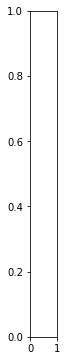

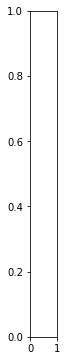

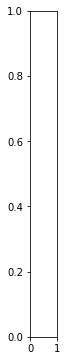

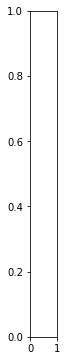

In [5]:
# Unfortunatelly because of bug in google (or unexpected behaviour) software we need to run it one be one with restarting kernel
make_maps(globs.cities.TOKYO_FILE, globs.cities.TOKYO, key, path=globs.cities.TOKYO_MAP_DIR)

In [ ]:
make_maps(globs.cities.ROME_FILE, globs.cities.ROME, key, path=globs.cities.ROME_MAP_DIR)

In [ ]:
make_maps(globs.cities.KRAKOW_FILE, globs.cities.KRAKOW, key, path=globs.cities.KRAKOW_MAP_DIR)

In [ ]:
make_maps(globs.cities.CZARNOBYL_FILE, globs.cities.CZARNOBYL, key, path=globs.cities.CZARNOBYL_MAP_DIR)

In [ ]:
# making maps for all processed data for region
make_maps(globs.regions.EUROPE_FILE, globs.regions.EUROPE, key, path=globs.regions.EUROPE_MAP_DIR)

In [ ]:
make_maps(globs.regions.USA_FILE, globs.regions.USA, key, path=globs.regions.USA_MAP_DIR)

In [ ]:
make_maps(globs.regions.CZECH_FILE, globs.regions.CZECH, key, path=globs.regions.CZECH_MAP_DIR)

In [ ]:
make_maps(globs.regions.JAPAN_FILE, globs.regions.JAPAN, key, path=globs.regions.JAPAN_MAP_DIR)

In [ ]:
# calculating corelation height and sea lecel for some places (example)
import globs
import data_processing

data_processing.calculate_correlation_example()

In [ ]:
#calculate covarience matrix for cities 
import data_processing
data_processing.calculate_and_save_covariance_matrix(globs.regions.EUROPE,globs.regions.EUROPE_MAP_DIR)
data_processing.calculate_and_save_covariance_matrix(globs.regions.USA,globs.regions.USA_MAP_DIR)
data_processing.calculate_and_save_covariance_matrix(globs.regions.CZECH,globs.regions.CZECH_MAP_DIR)
data_processing.calculate_and_save_covariance_matrix(globs.regions.JAPAN,path=globs.regions.JAPAN_MAP_DIR)


In [ ]:
#calculate covarience matrix for regions 
data_processing.calculate_and_save_covariance_matrix(globs.cities.ROME,globs.cities.ROME_MAP_DIR)
data_processing.calculate_and_save_covariance_matrix(globs.cities.TOKYO,globs.cities.TOKYO_MAP_DIR)
data_processing.calculate_and_save_covariance_matrix(globs.cities.KRAKOW,globs.cities.KRAKOW_MAP_DIR)
data_processing.calculate_and_save_covariance_matrix(globs.cities.CZARNOBYL,path=globs.cities.CZARNOBYL_MAP_DIR)
